In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import pickle
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
# append the current path
sys.path.append(os.getcwd())
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Datenvorereitung

In [3]:
# Laden des Datenset unter dem Pfad "../data/anomaly_detection.csv
# und speichern als Pandas DataFrame

df = pd.read_csv("C:/Users/itarch-user/Desktop/Uebung2/data/anomaly_detection.csv")

In [ ]:
# <-todo 1-1
# Geben Sie die shape des DataFrames df aus.
# ->



In [ ]:
# <-todo 1-2
# Visualisieren sie den Kopf (head) des DataFrames.
# ->



In [ ]:
# <-todo 1-3
# Entfernen Sie die NaN Werte aus dem DataFrame.
# Hinweis: Verwenden Sie vorhandene Pandas-Funktionen dazu.
# ->



In [6]:
# <-todo 1-4
# Setzen Sie den Index des DataFrames rück (reset).
# Hinweis: Verwenden Sie vorhandene Pandas-Funktionen dazu.
# Hinweis: Der alte Index wird nicht weiter benötigt.
# ->



In [ ]:
# <-todo 1-5
# Geben Sie die shape des DataFrames erneut aus.
# ->



In [ ]:
# <-todo 1-6
# Geben Sie die einzigartigen (unique) Elemente des DataFrames aus.
# ->



In [9]:
# <-todo 1-7
# Entfernen Sie irrelevante Daten.
# Hinweis: Irrelevante Daten sind in der Spalte "correct_assembly" als "not_relevant" gekennzeichnet.
#
# ->



In [10]:
# <-todo 1-8
# Geben Sie die shape des DataFrames erneut aus.
# ->



(119800, 4)

In [11]:
# <-todo 1-9
# Konvertieren Sie die Labels zu kategorischen (categorial) Daten unter Verwendung von Pandas Funktionalitäten.
# Gewünscht sind zwei Kategorien: false und true.
# ->



Categorical labels:  [true, false]
Categories (2, object): [true, false]


* Frage 1-1: Weshalb ist es sinnvoll kategorische Datenstrukturen zu wählen? 

...

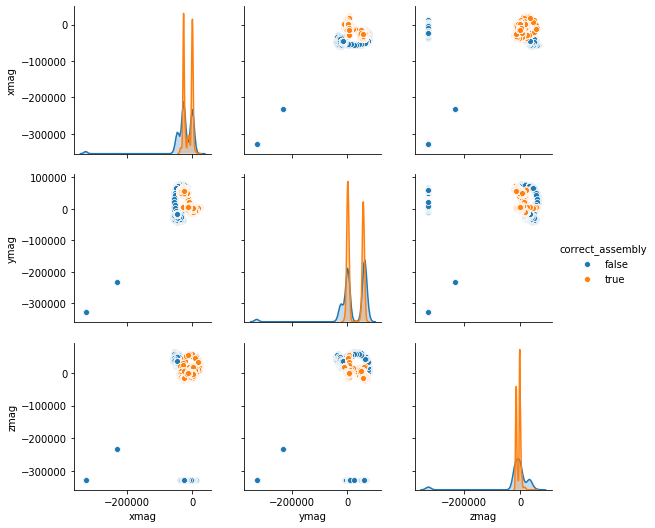

In [41]:
# Visualisierung der Datenverteilungen und Korrelationen des dataFrames.

sns.pairplot(df, hue="correct_assembly")

* Frage 1-2: Welche Besonderheiten von realen Daten können Sie erkennen?

In [58]:
# <-todo 1-10
# Das DataFrame enthält Ausreißer (outlier), die nun entfernt werden sollen.
# Die Ausreißer sollen mittels Betrachtung von Median und Standardabweichung 
# ermittelt und aus dem dataFrame entfernt werden.
#
# ->

# print the dataframes shape
print(np.shape(df))

# define the desired median
m=5
# copy the dataFrame
df_no_outlier = df.copy()
flags = ['xmag', 'ymag', 'zmag']
for flag in flags:
    data = df_no_outlier[flag].values
    # compute the absolute deviation
    d = np.abs(data - np.median(data))
    # compute the Median absolute deviation
    mdev = np.median(d)
    # prevent dividing by zero
    s = d / (mdev if mdev else 1.)
    df_no_outlier = df_no_outlier[s < m]

print(np.shape(df_no_outlier))


(119800, 4)
(114064, 4)


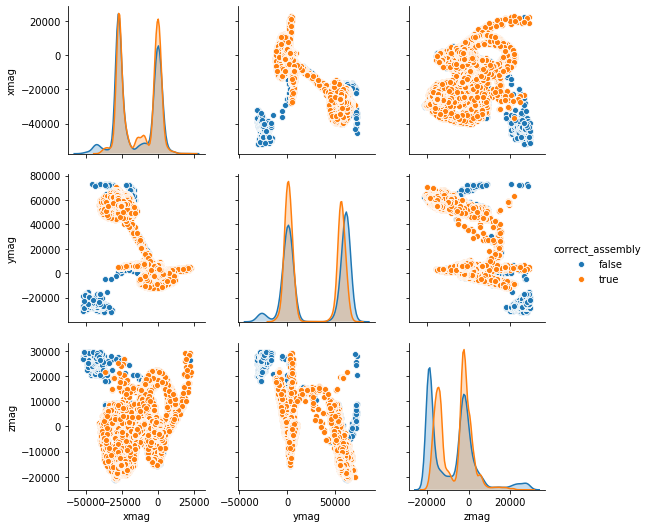

In [48]:
# <-todo 1-11
# Visualisieren Sie die Datenverteilungen und Korrelationen des dataFrames erneut 
# um zu die Ausreißeruntdrückung zu validieren.
# ->

sns.pairplot(df_no_outlier, hue="correct_assembly")

In [18]:
# <-todo 1-12
# Erzeugen Sie eine Matrix X welche die features "xmag", "ymag" und "zmag" enthält.
# Erzeugen Sie einen Vektor y der die labels "correct_assembly" enhält als Integerwerte (0 und 1) enthält.
# Hinweis: Verwenden Sie Pandas Categorical.codes.
# ->



# <-todo 1-12
# Splitten Sie dern Datensatz und erzeugen Sei Trainings- und Testset.
# Parametrieren Sie die Größe des Testets mit 10 %.
# ->



# 2. k-Nearest Neighbors

In [19]:
# <-todo 2-1
# Erzeugen Sie ein KNeighborsClassifier Objekt und parametrieren Sie n=1.
# Trainieren Sie den Classifier mit dem Trainingsset.
# ->



In [20]:
# <-todo 2-2
# Berechnen sie die Genauigkeit (score) des KNeighborsClassifiers auf dem Trainings- und Testset.
# ->



Train set accuracy: 0.988
Test set accuracy: 0.957


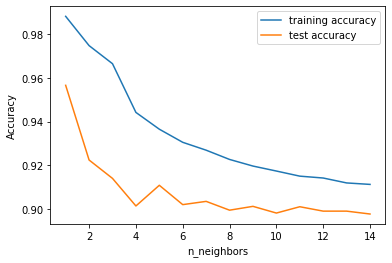

In [21]:
# <-todo 2-3
# Verwenden Sie eine for-Schleife um KNeighborsClassifiers-Objekte für die Parameterwerte
# 1 bis 15 erzeugen und trainieren Sie diese.
# Erstellen Sie einen Plot, der die Anzahl der nachbarn über 
# die Genauigkeit des Trainings- bzw. testset darstellt.
# ->



* Frage 2-1: Ist anhand Ihres Plots Over- bzw. Underfitting erkennbar? Falls ja, an welcher Stelle?

* Frage 2-2:  Welcher n-Parameter erzeugt ein weder zu komplexes, noch ein zu einfaches Modell mit einer guten Generalisierungsleistung?

# 3. Lineare Modelle

In [59]:
# <-todo 3-1
# Erzeugen Sie ein lineares SupportVectorClassifier-Objekt.
# Trainieren Sie den Klassifikator.
# ->



In [60]:
# <-todo 3-2
# Berechnen Sie die Genauigkeit des Klassifikators auf dem Trainings- und Testset.
# ->



Train set accuracy: 0.801
Test set accuracy: 0.795


In [33]:
# <-todo 3-3
# Erzeugen Sie ein LogisticRegression-Objekt.
# Trainieren Sie den Klassifikator unter Verwendung des Trainindatensatzes.
# ->



In [35]:
# <-todo 3-4
# Berechnen Sie die Genauigkeit des Klassifikators auf dem Trainings- und Testset.
# ->



Training set score: 0.911
Test set score: 0.898


([<matplotlib.axis.XTick at 0x7f04ce255278>,
 <a list of 3 Text xticklabel objects>)

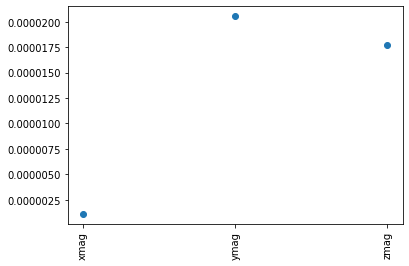

In [78]:
# <-todo 3-5
# Visualisieren Sie die Koeffizienten-Magnituden aller Features des LogisticRegression-Klassifikators.
# ->



* Frage 3-1:  Ist eine Regularisierung (Ridge) vorteilhaft? Begründen Sie.

# 4. Decision Trees

In [36]:
# <-todo 4-1
# Erzeugen Sie ein DecisionTreeClassifier-Objekt.
# Trainieren Sie es mit dem Trainings- und Testset.
# ->



In [37]:
# <-todo 4-2
# Berechnen Sie die Genauigkeit des DecisionTreeClassifiers auf dem Trainings- und Testset.
# ->



Accuracy on training set: 0.991
Accuracy on test set: 0.957


* Frage 4-1: Weshalb erreichen Sie beim Einsatz eines Entscheidungsbaumes keine Genauigkeit von 100% auf dem Trainingsset?
* Frage 4-2: Tritt Over- bzw. Underfitting auf?
* Frage 4-3: Was kann getan werden um Over- / Underfitting zu vermeiden?

In [70]:
# <-todo  4-3
# create a Decision Tree Classifier object unter Verwendung von Pre-Pruning
# ->



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
# <-todo 4-4
# Berechnen Sie die Genauigkeit des DecisionTreeClassifiers auf dem Trainings- und Testset
# ->


Accuracy on training set: 0.865
Accuracy on test set: 0.860


In [72]:
# <-todo 4-5
# Speichern Sie den Entscheidungsbaum als "tree.dot"-Datei
# ->


In [1]:
# <-todo 4-6
# Visualisieren Sie die "tree.dot" Datei 
# Achtung: Bei Decision-Trees mit mehr als 10 Leveln kann dies lange dauern
# ->
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


Feature importances:


Text(0, 0.5, 'Feature')

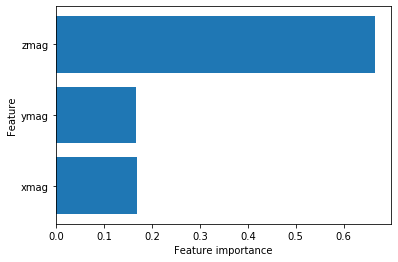

In [105]:
# <-todo 4-7
# Visualisieren Sie die feature-importance "xmag", "ymag" und "zmag"
# ->


* Frage 4-5: Gibt es Feature, welches wichtiger als die anderen ist? Falls ja, welches?
* Frage 4-6: Kann der Klassifikator auch mit weniger features trainiert werden?